In [3]:
import numpy as np
x = np.random.randint(50,size=1000)
y =np.random.randint(4,size=1000)*x+np.random.randint(100,size=1000)

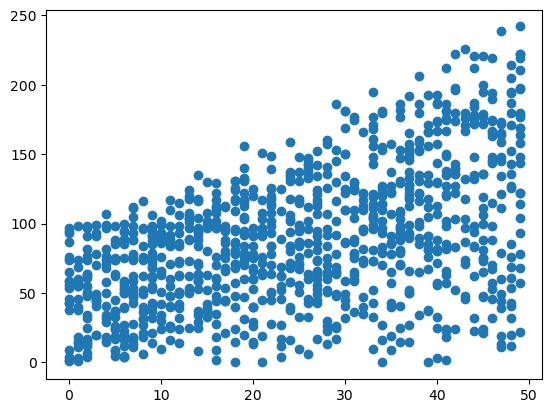

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [5]:
import pandas as pd
data = pd.DataFrame(x)
t=pd.DataFrame(y)
data = pd.concat([data, t], axis=1, join='inner')
data.columns = ["x","y"]
data.head()

,x,y
0,17,86
1,27,62
2,40,129
3,2,82
4,36,91


In [14]:
dat = data.sample(frac=1)
ratio = 0.75
tot_rows = dat.shape[0]
train_size = int(tot_rows*ratio)
x = dat.iloc[:,:-1].values
y = dat.iloc[:,-1:].values
x_train = x[0:train_size]
x_test = x[train_size:]
y_train = y[0:train_size]
y_test = y[train_size:]

## Finding slope and intercept using statistical approach

In [15]:
x_mean = sum(x_train)/len(x_train)
y_mean = sum(y_train)/len(y_train)
m = sum((x_train-x_mean)*(y_train-y_mean))/sum((x_train-x_mean)**2)
c = y_mean - (m*x_mean)

In [16]:
y_pred = (m* x_test)+ c
print("Coeff: ",m)
print("Intercept: ",c)

Coeff:  [1.71605554]
Intercept:  [45.69860022]


## Gradient Descent

In [25]:
m = 50
c = 50
l = 0.001

In [26]:
for i in range(len(data)):
    y_pre = m* data["x"] + c
    deri_slope = (-2/len(data["x"]))*sum((data["x"] * (data['y'] - y_pre)))
    deri_inter =  (-2/len(data["x"]))*sum((data["y"] - y_pre))
    m = m - l*deri_slope
    c = c- l*deri_inter

In [27]:
print(c)
print(m)

47.78239587299401
1.6376192178073743


## Using sklearn library

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [28]:
print(reg.intercept_)
print(reg.coef_)

[45.69860022]
[[1.71605554]]


## inference

* By using sklearn library , the intercept is 45.69 and coefficient is 1.71.
* In Gradient descent method , the intercept resulted is 18.70 and coeffcient is 2.51 when slope and intercept intialised with 0 but, when slope an intercept intialized with 50, the intercept resulted is 47.78 and coffcient is 1.63 which is approximately equal to the values resulted using sklearn library.